In [11]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']

In [12]:
guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
dataset_2018 = dataset_2018.fillna(0)
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
dataset_2019 = dataset_2019.fillna(0)
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
dataset_2020 = dataset_2020.fillna(0)
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']


In [13]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
print(sigoongu)


25 개
['강동구', '양천구', '노원구', '강서구', '용산구', '금천구', '서대문구', '마포구', '광진구', '영등포구', '송파구', '성동구', '동대문구', '중구', '성북구', '강남구', '종로구', '도봉구', '동작구', '서초구', '구로구', '중랑구', '관악구', '강북구', '은평구']


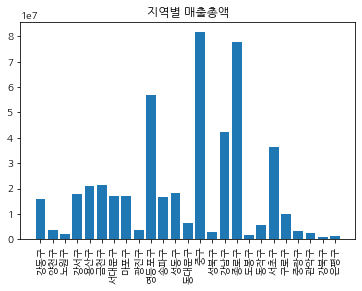

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
maechool = []
for idx, gu in enumerate(sigoongu):
    dateset_line = dataset[dataset['시군구명']==gu]
    maechool.append(dateset_line['매출총액'].sum()/len(dateset_line['매출총액']))
plt.title('지역별 매출총액')
plt.bar(sigoongu, maechool)
plt.xticks(rotation=90)
plt.show()

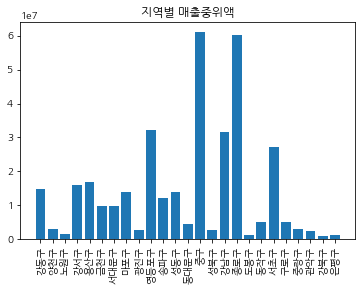

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
maechool = []
for idx, gu in enumerate(sigoongu):
    dateset_line = dataset[dataset['시군구명']==gu]
    maechool.append(dateset_line['매출중위액'].sum()/len(dateset_line['매출중위액']))
plt.title('지역별 매출중위액')
plt.bar(sigoongu, maechool)
plt.xticks(rotation=90)
plt.show()

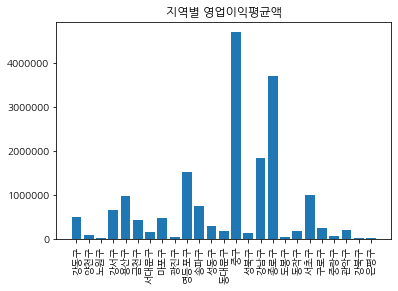

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
maechool = []
for idx, gu in enumerate(sigoongu):
    dateset_line = dataset[dataset['시군구명']==gu]
    maechool.append(dateset_line['영업이익평균액'].sum()/len(dateset_line['영업이익평균액']))
plt.title('지역별 영업이익평균액')
plt.bar(sigoongu, maechool)
plt.xticks(rotation=90)
plt.show()

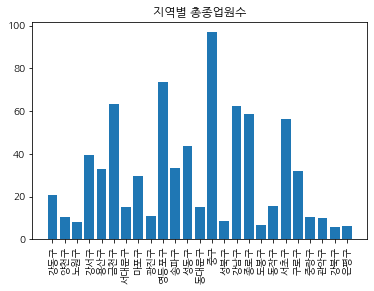

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
maechool = []
for idx, gu in enumerate(sigoongu):
    dateset_line = dataset[dataset['시군구명']==gu]
    maechool.append(dateset_line['총종업원수'].sum()/len(dateset_line['총종업원수']))
plt.title('지역별 총종업원수')
plt.bar(sigoongu, maechool)
plt.xticks(rotation=90)
plt.show()

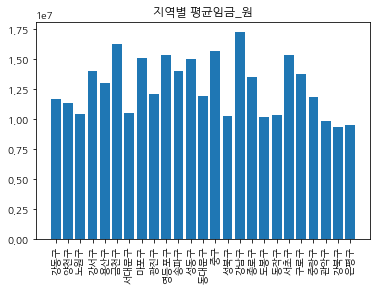

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'
maechool = []
for idx, gu in enumerate(sigoongu):
    dateset_line = dataset[dataset['시군구명']==gu]
    maechool.append(dateset_line['평균임금_원'].sum()/len(dateset_line['평균임금_원']))
plt.title('지역별 평균임금_원')
plt.bar(sigoongu, maechool)
plt.xticks(rotation=90)
plt.show()

In [35]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    # print(gu,": ", temp)

In [36]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    # print(gu,": ", temp)

강동구 :  16071978.654530745
양천구 :  3739588.2297236067
노원구 :  1950302.167769092
강서구 :  18005867.46231279
용산구 :  20849056.533996683
금천구 :  21516975.077864837
서대문구 :  16933359.60252193
마포구 :  17003282.45811128
광진구 :  3739304.407805227
영등포구 :  56938210.535971925
송파구 :  16824813.347334716
성동구 :  18398624.648102816
동대문구 :  6572286.618009479
중구 :  81645989.89594822
성북구 :  3023371.4539411208
강남구 :  42240348.13420108
종로구 :  77792890.0254777
도봉구 :  1590207.2477216239
동작구 :  5681325.456087824
서초구 :  36259805.30569787
구로구 :  10047119.840464344
중랑구 :  3285074.451090343
관악구 :  2549949.9048634814
강북구 :  1018988.2578253706
은평구 :  1427912.8037234042


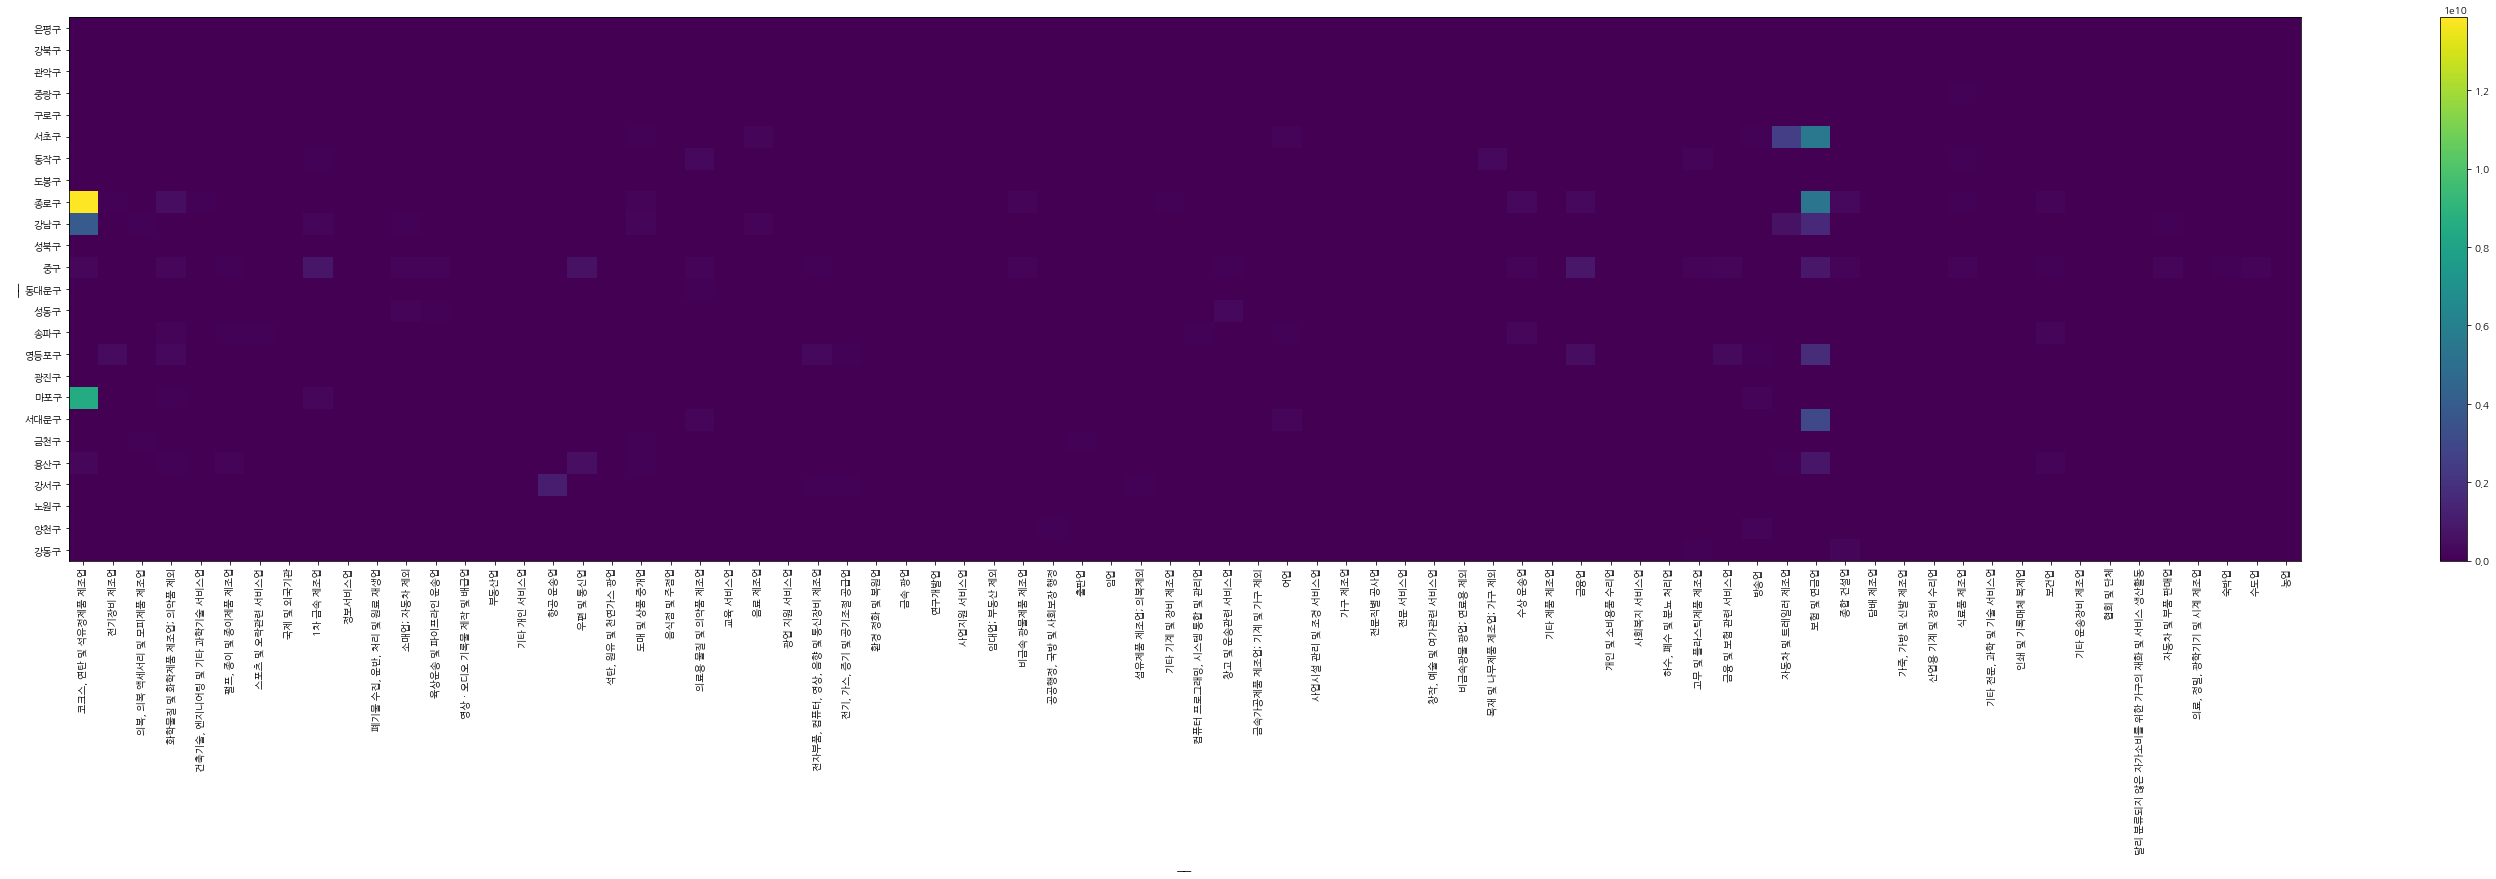

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    print(gu, ': ', temp['매출총액'].sum()/len(temp['매출총액']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    for title in title_count.keys():
        step = temp[temp['업종중분류명'] == title]
        maechool_total_avg = step['매출총액'].sum()/len(step['매출총액'])
        title_count[title] = maechool_total_avg

    pack.append(title_count)
    # print(title_count)
    # break



big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

강동구 :  507131.29530744336
양천구 :  93251.46669687358
노원구 :  22971.35898977751
강서구 :  661064.0456665849
용산구 :  991956.3339966832
금천구 :  446579.95788442704
서대문구 :  160780.94353070174
마포구 :  477291.6256661693
광진구 :  59559.912280701756
영등포구 :  1538573.5509845973
송파구 :  759798.1753625919
성동구 :  310120.85985312116
동대문구 :  188004.88720379147
중구 :  4701158.114121314
성북구 :  139268.89791073123
강남구 :  1835168.979129264
종로구 :  3706485.213086277
도봉구 :  61706.94946147473
동작구 :  188971.53892215568
서초구 :  1001305.474305232
구로구 :  262123.4616915423
중랑구 :  63896.468535825545
관악구 :  216233.53199658703
강북구 :  21466.620263591434
은평구 :  32723.075531914892


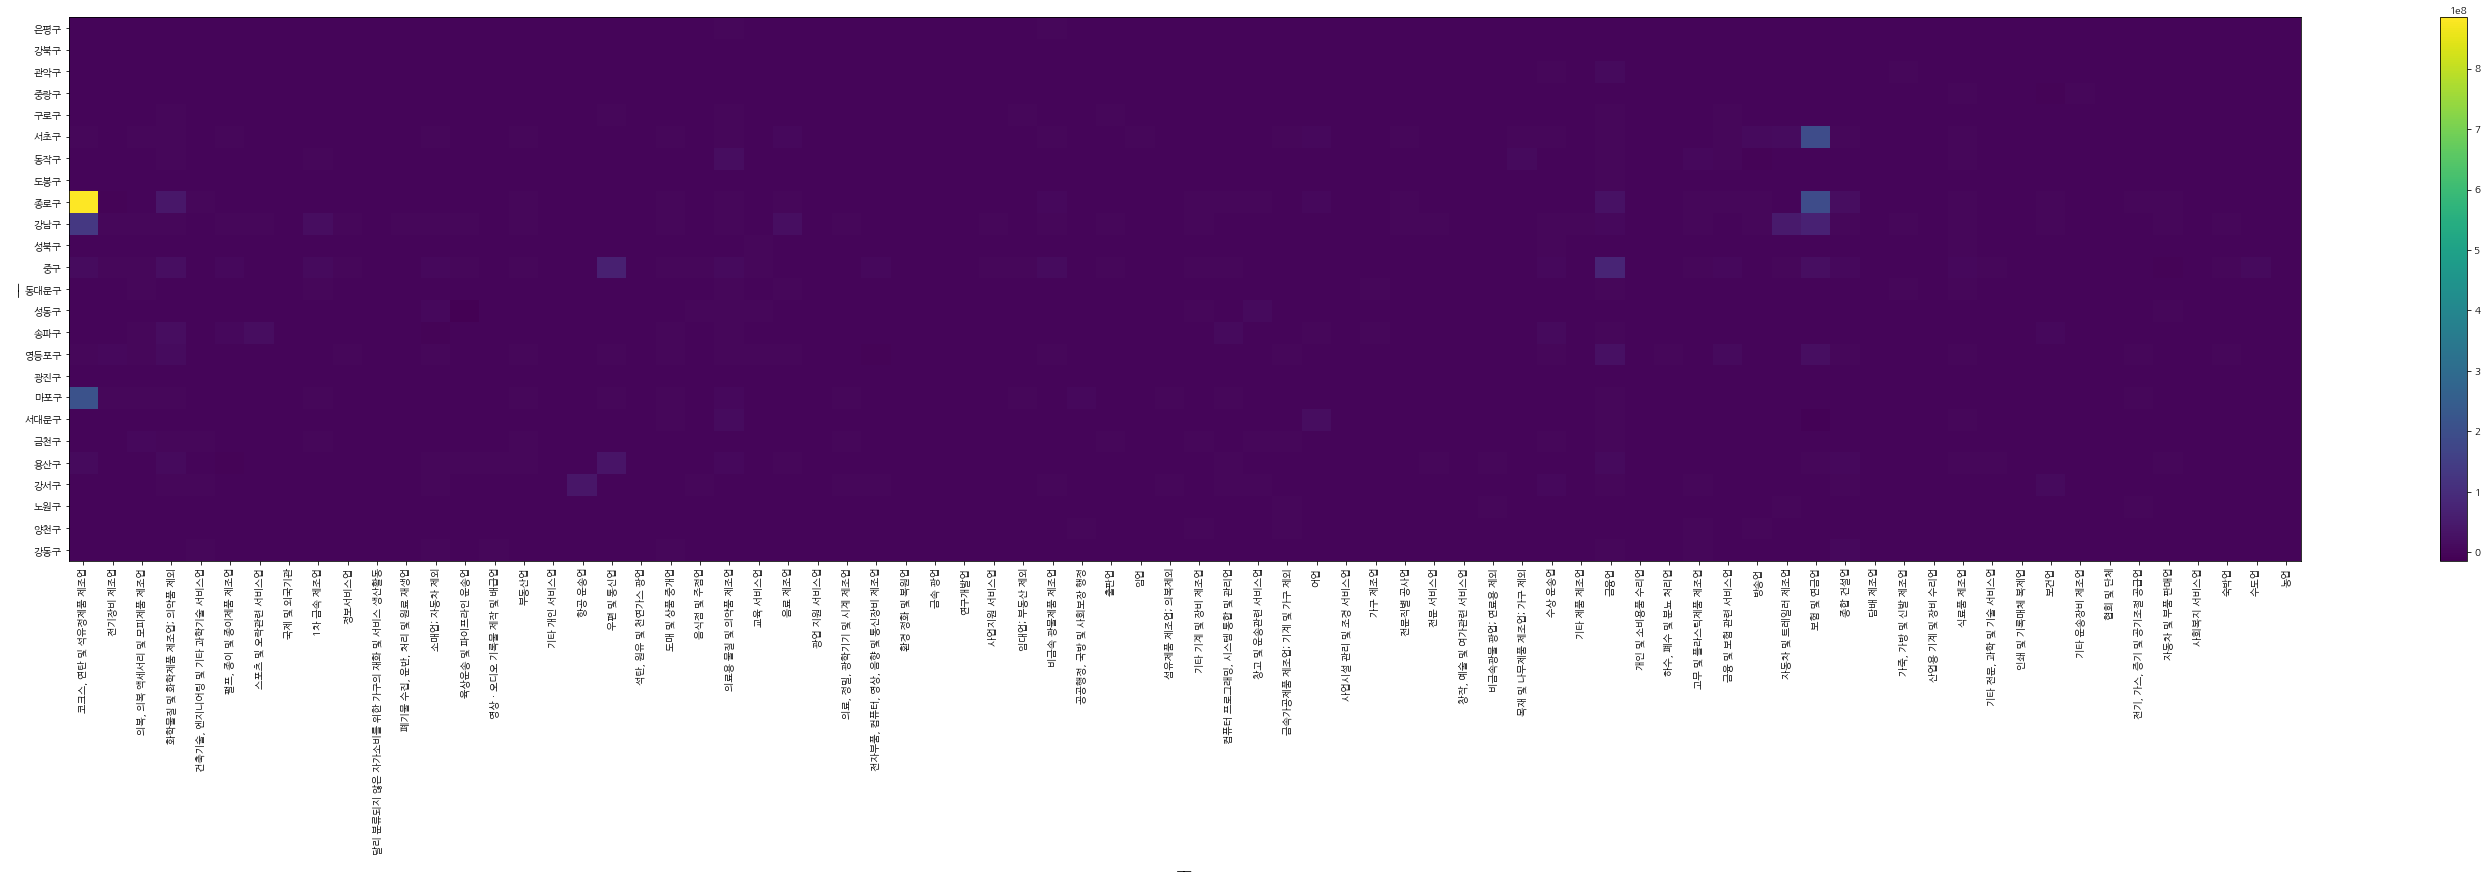

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    print(gu, ': ', temp['영업이익평균액'].sum()/len(temp['영업이익평균액']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    for title in title_count.keys():
        step = temp[temp['업종중분류명'] == title]
        maechool_total_avg = step['영업이익평균액'].sum()/len(step['영업이익평균액'])
        title_count[title] = maechool_total_avg

    pack.append(title_count)
    # print(title_count)
    # break



big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

강동구 :  11683830.384304207
양천구 :  11329077.842772994
노원구 :  10469103.655441971
강서구 :  14036722.153449547
용산구 :  12979570.405638475
금천구 :  16238735.365328109
서대문구 :  10487770.284539474
마포구 :  15131351.624600299
광진구 :  12059433.525241675
영등포구 :  15370809.755897837
송파구 :  14009154.822000377
성동구 :  15048182.156976745
동대문구 :  11923688.00900474
중구 :  15665736.602493407
성북구 :  10283361.270180438
강남구 :  17244970.910570018
종로구 :  13490731.224667052
도봉구 :  10219609.026512014
동작구 :  10320055.251497006
서초구 :  15334439.510945505
구로구 :  13725322.403980099
중랑구 :  11821840.446728973
관악구 :  9817311.06228669
강북구 :  9365721.881383855
은평구 :  9527220.395744681


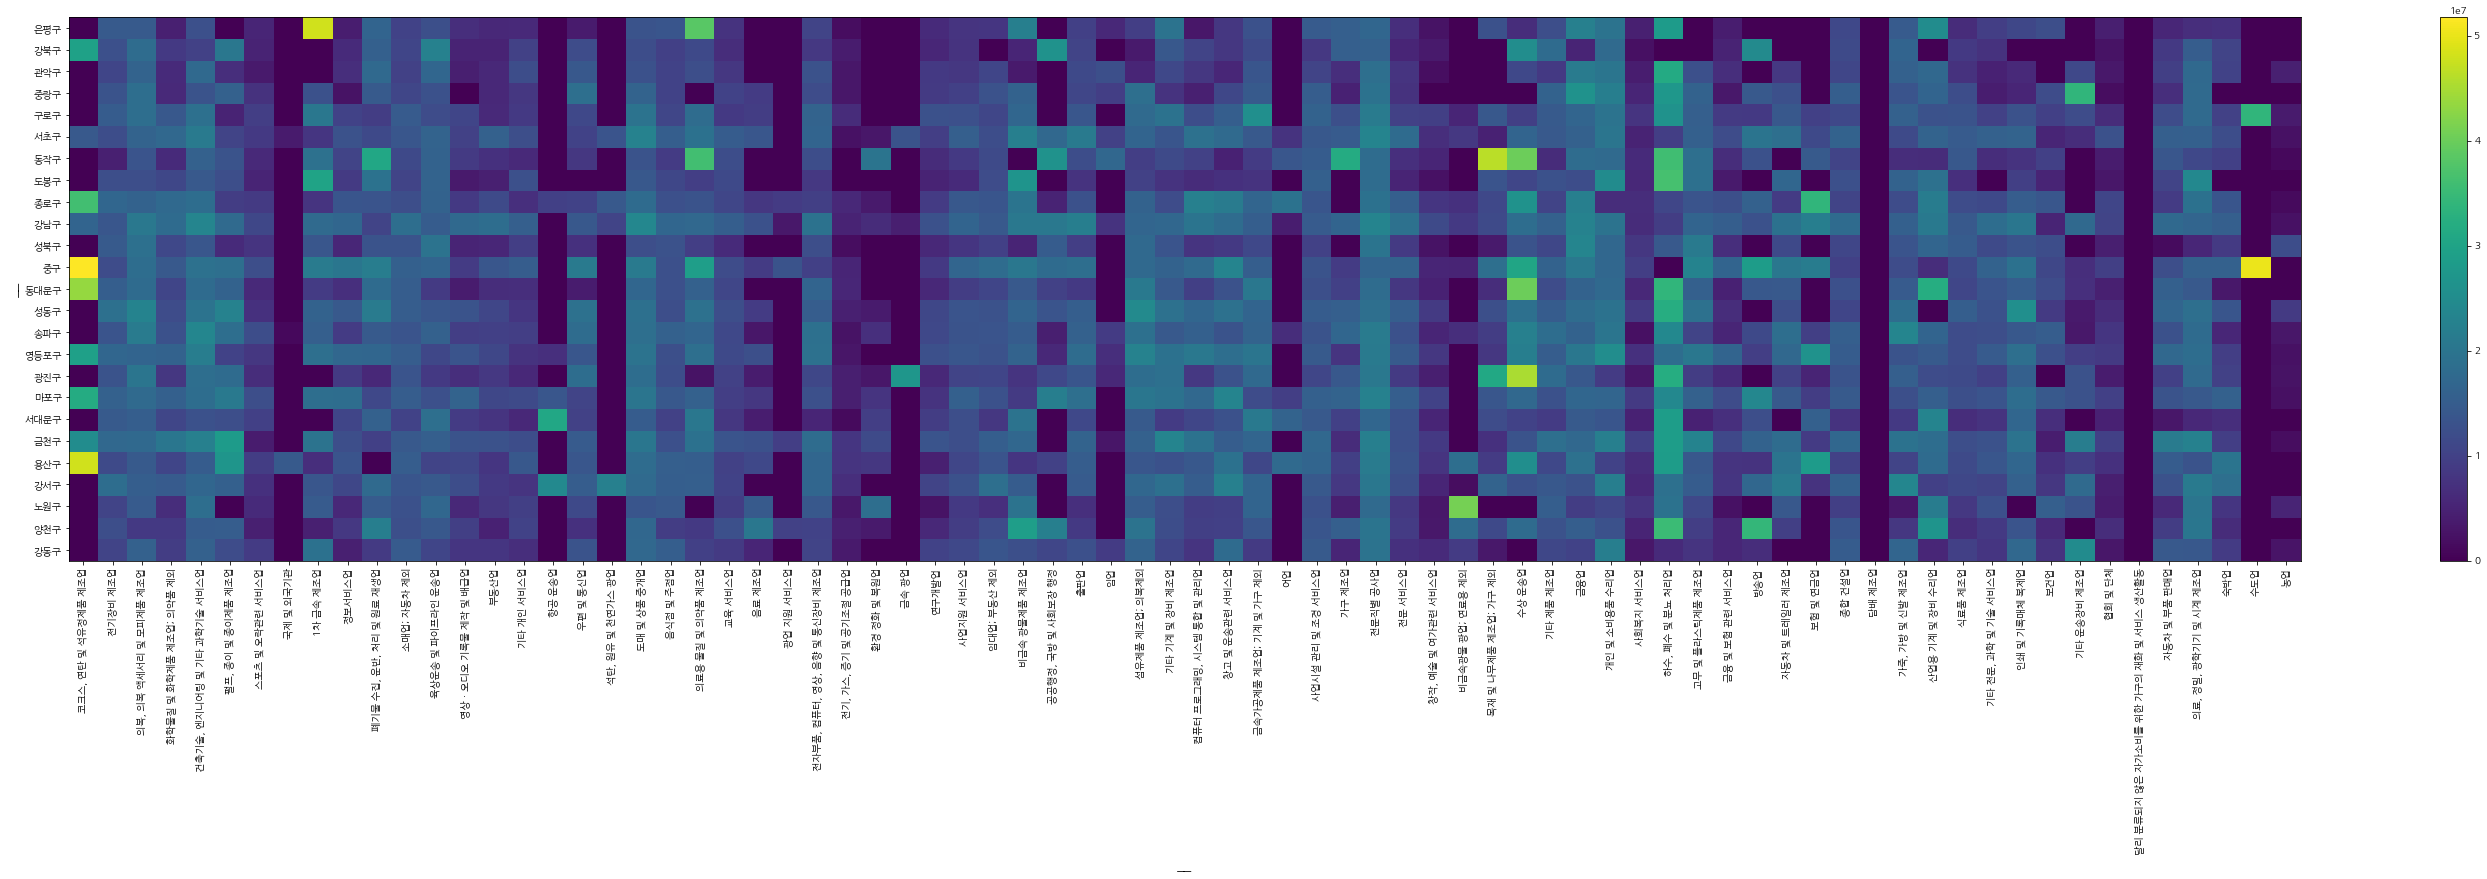

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    print(gu, ': ', temp['평균임금_원'].sum()/len(temp['평균임금_원']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    for title in title_count.keys():
        step = temp[temp['업종중분류명'] == title]
        maechool_total_avg = step['평균임금_원'].sum()/len(step['평균임금_원'])
        title_count[title] = maechool_total_avg

    pack.append(title_count)
    # print(title_count)
    # break



big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

강동구 :  20.802588996763753
양천구 :  10.465790666062528
노원구 :  7.936259771497294
강서구 :  39.27596366314756
용산구 :  33.03217247097844
금천구 :  63.54309500489716
서대문구 :  15.19078947368421
마포구 :  29.645065018119805
광진구 :  10.958467597565342
영등포구 :  73.43263794111913
송파구 :  33.47071011489923
성동구 :  43.85220318237454
동대문구 :  14.908056872037914
중구 :  96.91512826660274
성북구 :  8.481481481481481
강남구 :  62.28444793536804
종로구 :  58.706716850028954
도봉구 :  6.780447390223695
동작구 :  15.661177644710579
서초구 :  56.13181183046111
구로구 :  31.771144278606965
중랑구 :  10.246105919003115
관악구 :  9.946672354948806
강북구 :  5.823723228995058
은평구 :  6.103191489361702


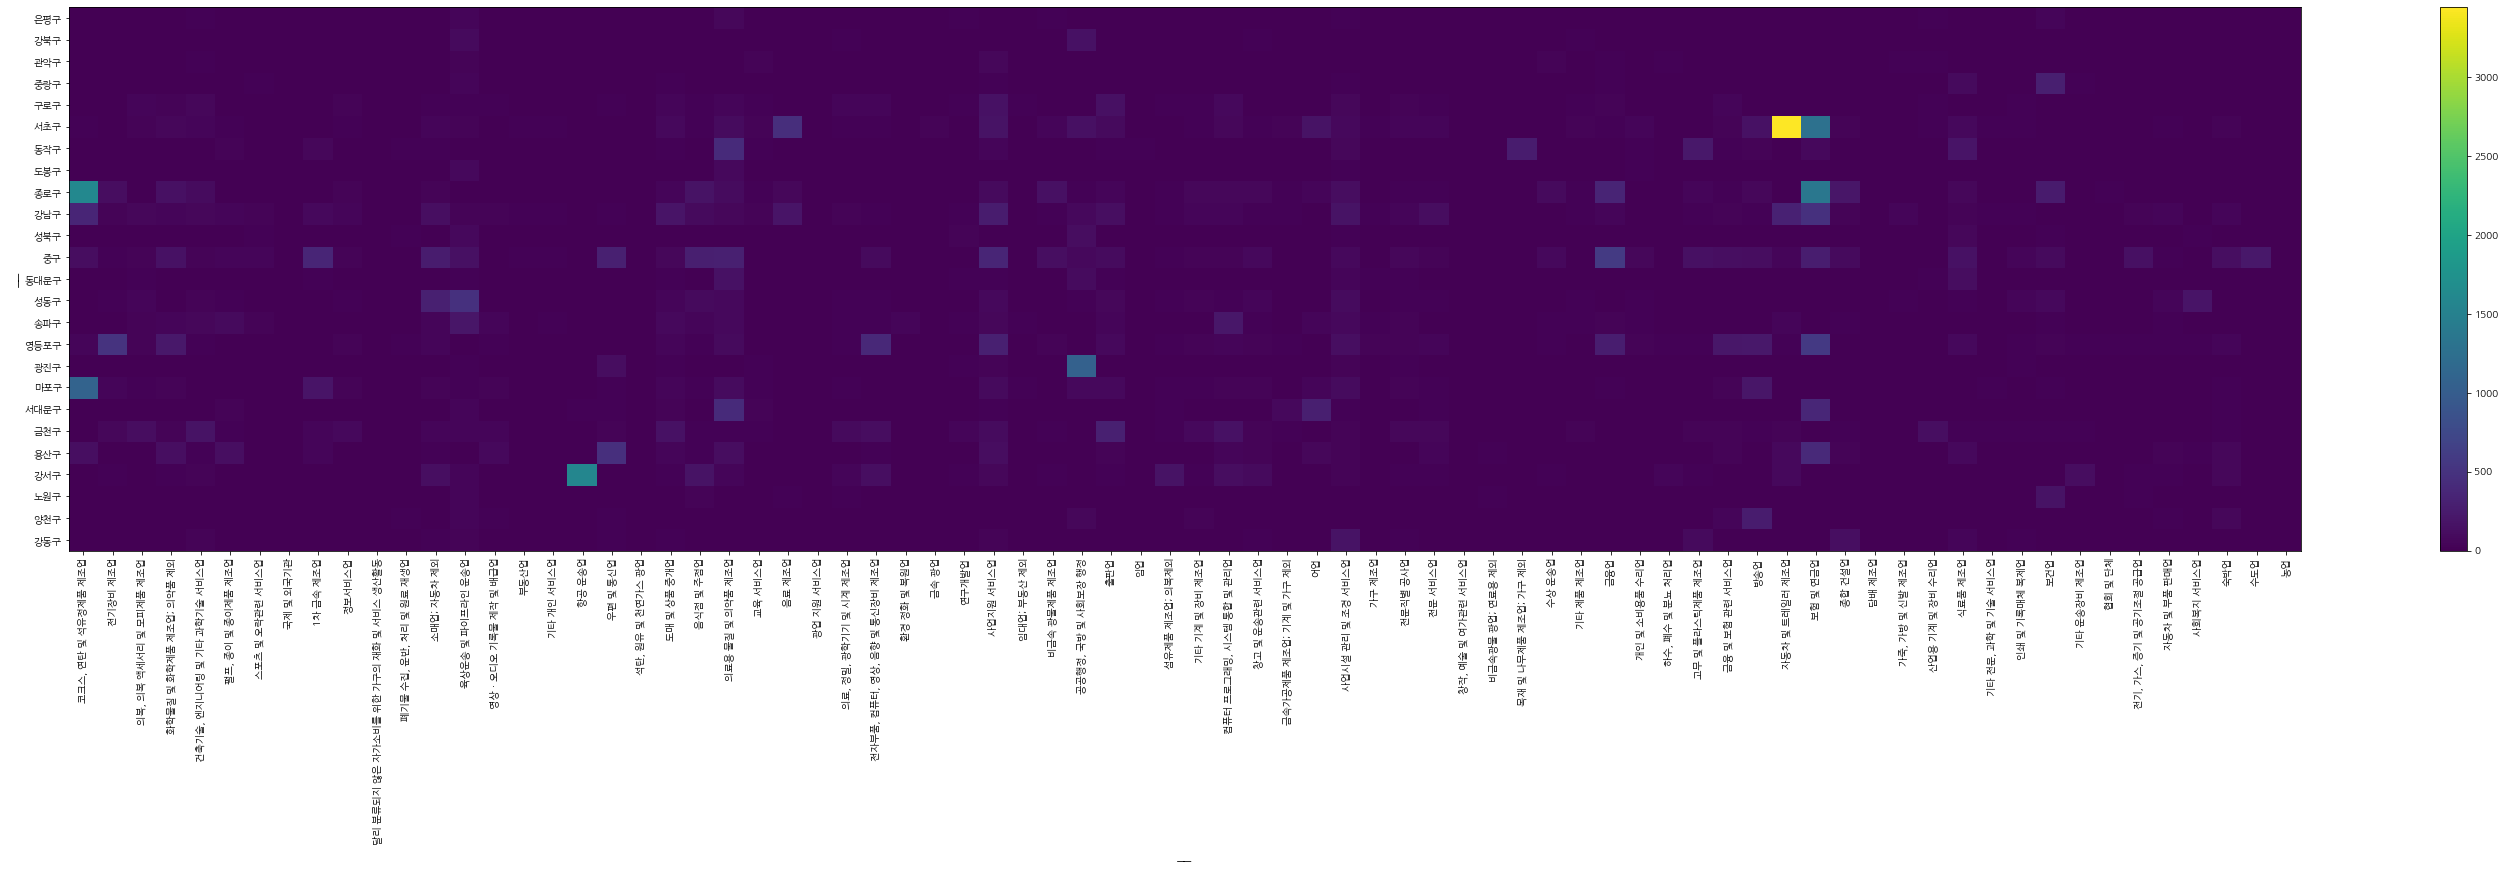

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    print(gu, ': ', temp['총종업원수'].sum()/len(temp['총종업원수']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    for title in title_count.keys():
        step = temp[temp['업종중분류명'] == title]
        maechool_total_avg = step['총종업원수'].sum()/len(step['총종업원수'])
        title_count[title] = maechool_total_avg

    pack.append(title_count)
    # print(title_count)
    # break



big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()